In [349]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [350]:
pylab.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator

In [351]:
data = pd.read_excel(r'/Users/lszczyrba/Project_3.6.3/HelloWorld/Irma_Sediment/CleanArtficialData_Marker_DateDiff_Binarized_Cells.xlsx')
df = pd.DataFrame(data)
df = df.set_index(['Ste_Stn'])

# Set Up BW2 - BW2 S1 for a regression

In [352]:
BW2_S1 = df.loc['BW2 - BW2 S1']
BW2_S1 = pd.DataFrame(BW2_S1)
BW2_S1 = BW2_S1.T

BW2_S1 = pd.DataFrame(BW2_S1)
BW2_S1

for station in BW2_S1.index:   
    x1 = BW2_S1.loc[station]['DiffTime1']
    x2 = BW2_S1.loc[station]['DiffTime2']
    x3 = BW2_S1.loc[station]['DiffTime3']
    y1 = BW2_S1.loc[station]['ThicknessD1cm']
    y2 = BW2_S1.loc[station]['ThicknessD2cm']
    y3 = BW2_S1.loc[station]['ThicknessD3cm']
    
xvalue = [x1, x2, x3]
yvalue = [y1, y2, y3]




In [353]:
xvalue = pd.DataFrame(xvalue)
xvalue

yvalue = pd.DataFrame(yvalue)
yvalue




,0
0,9.0
1,4.0
2,4.0


# Regression for BW2_S1

In [354]:
lin_reg = LinearRegression()
lin_reg.fit(xvalue, yvalue)

lin_reg.intercept_

lin_reg.score(xvalue, yvalue)

0.4477024739817782

# Histograms 

In [355]:
%matplotlib notebook

<IPython.core.display.Javascript object>


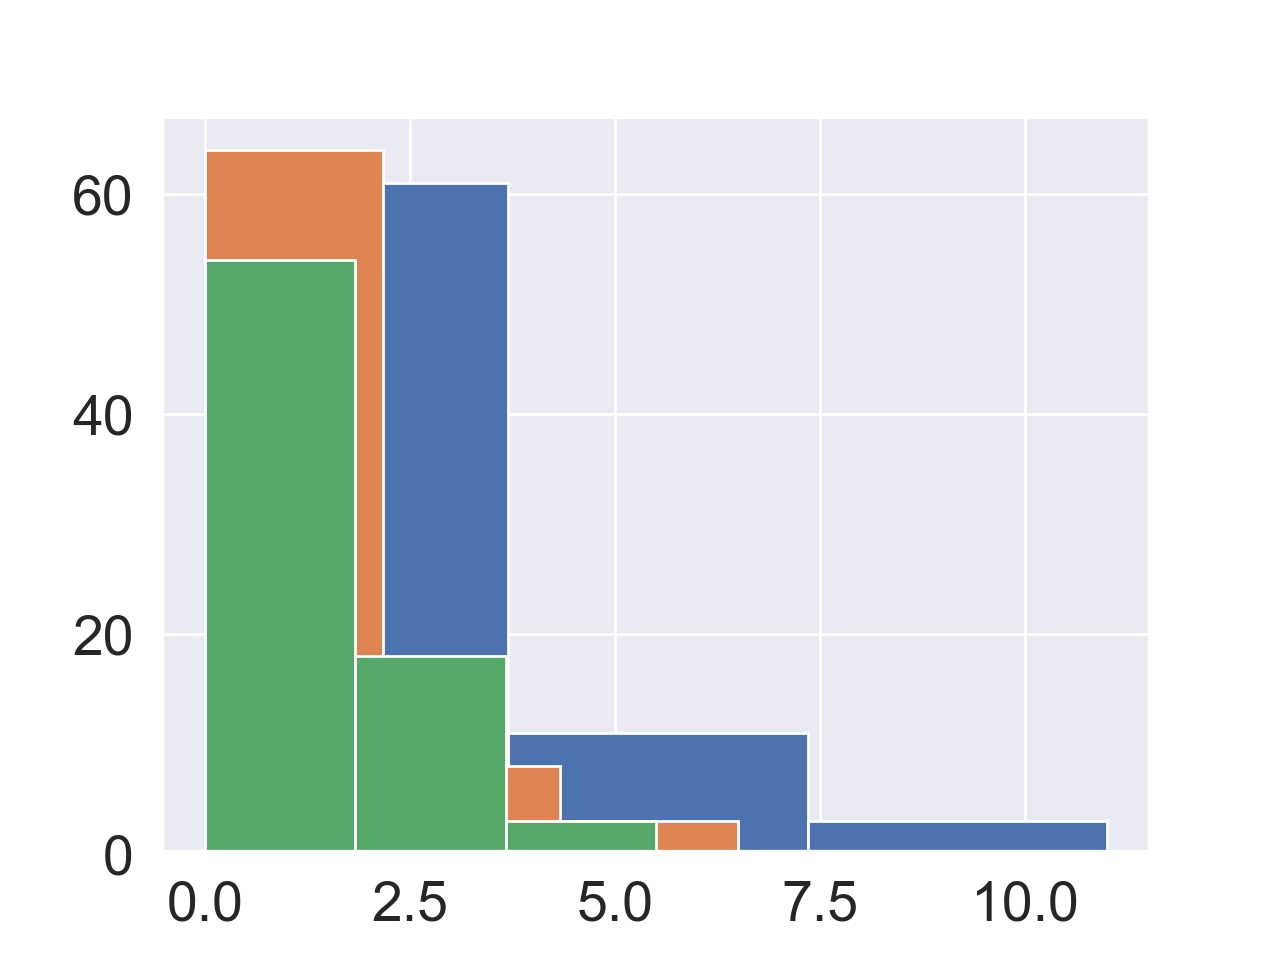

In [356]:
x_axis = df['ThicknessD1cm']
x_axis.hist(bins = 3)

In [357]:
x_axis2 = df['ThicknessD2cm']
x_axis2.hist(bins = 3)

In [358]:
x_axis3 = df['ThicknessD3cm']
x_axis3.hist(bins = 3)


In [359]:
plt.close()

# Histogram with bin values displayed

<IPython.core.display.Javascript object>


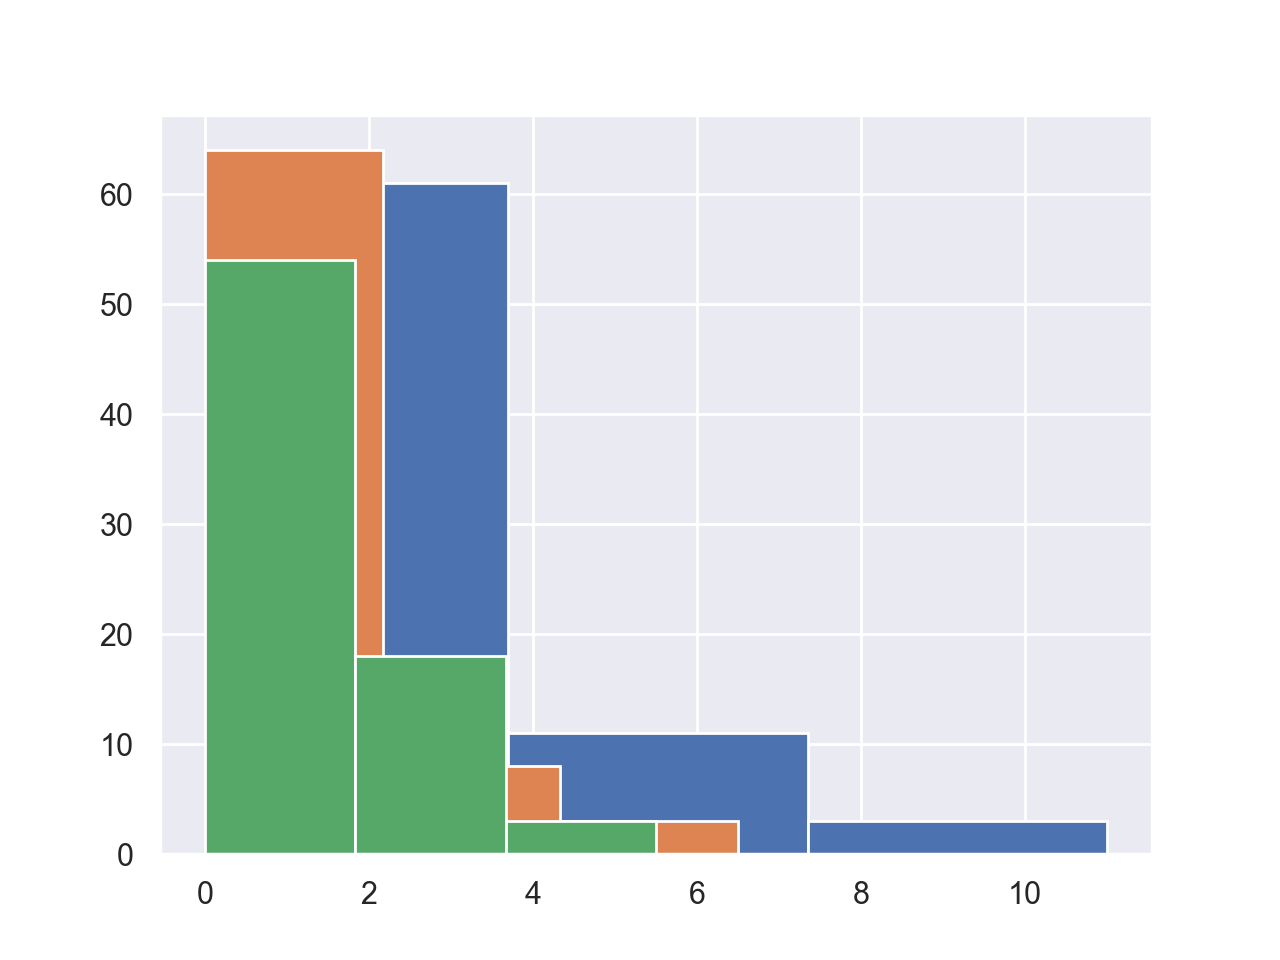

(array([ 61.,  11.,   3.]),
 array([  0.05,   3.7 ,   7.35,  11.  ]),
 <a list of 3 Patch objects>)

In [360]:
sns.set()
x = plt.hist(df['ThicknessD1cm'], bins = 3)
x


In [361]:
x = plt.hist(df['ThicknessD2cm'], bins = 3)
x

(array([ 64.,   8.,   3.]),
 array([ 0.        ,  2.16666667,  4.33333333,  6.5       ]),
 <a list of 3 Patch objects>)

In [362]:
x = plt.hist(df['ThicknessD3cm'], bins = 3)
x

(array([ 54.,  18.,   3.]),
 array([ 0.        ,  1.83333333,  3.66666667,  5.5       ]),
 <a list of 3 Patch objects>)

In [363]:
plt.close()

# Combo Histogram 

<IPython.core.display.Javascript object>


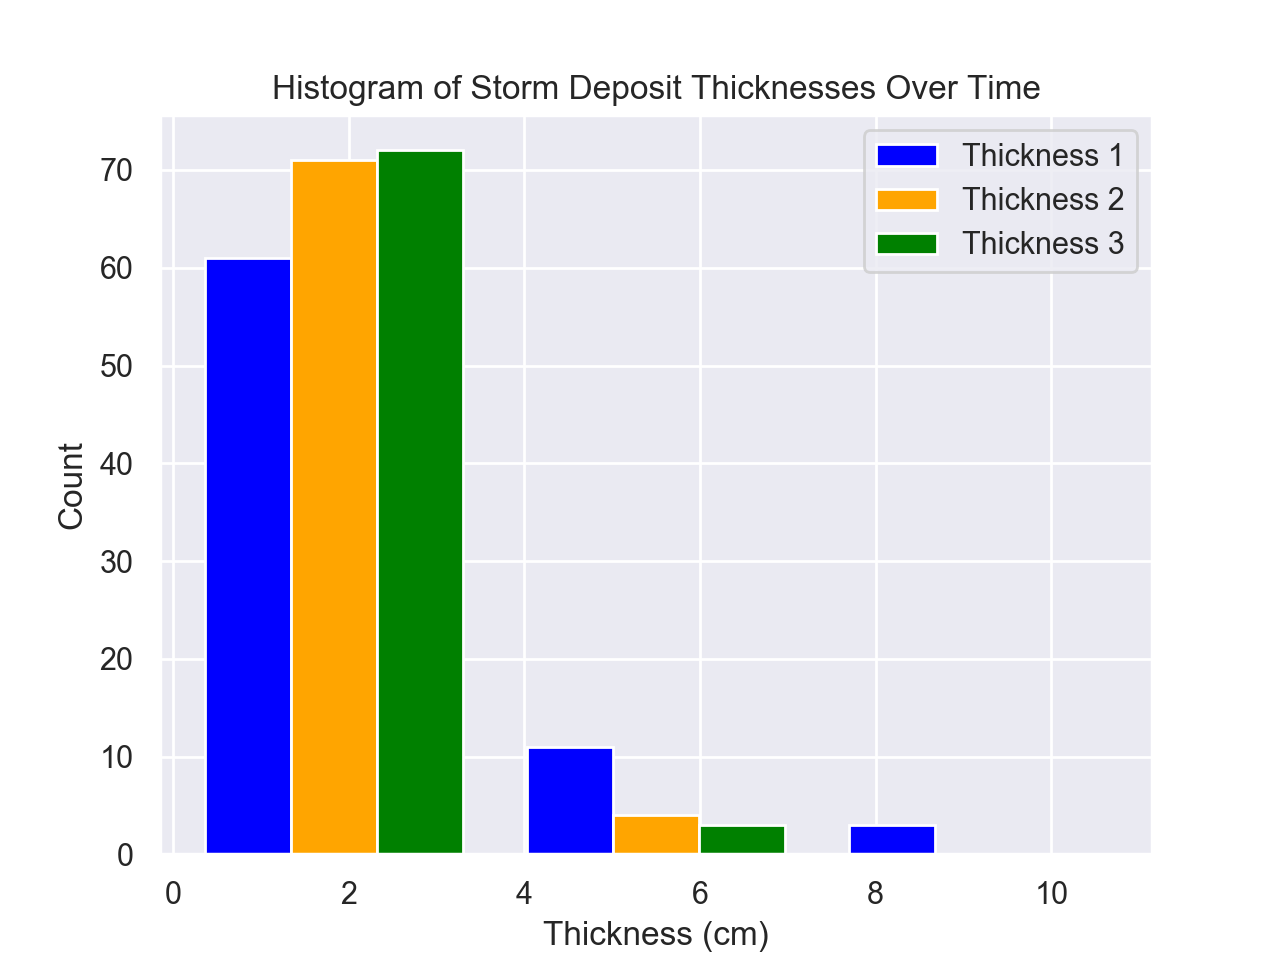

In [364]:
plt.hist([df['ThicknessD1cm'], df['ThicknessD2cm'], df['ThicknessD3cm']], bins = 3, 
         color = ['blue', 'orange', 'green'], label = ['Thickness 1', 'Thickness 2', 'Thickness 3'])
plt.legend()
plt.xlabel('Thickness (cm)')
plt.ylabel('Count')
plt.title('Histogram of Storm Deposit Thicknesses Over Time')

plt.show()

In [365]:
plt.close()

# Boolean masking to get values from first bins

In [366]:
df.head()

,Site,Station,Region,Date1,Date2,Date3,ThicknessD1cm,ThicknessD2cm,ThicknessD3cm,Lat,...,BW3,CBD,LAD,LNK,UFU,WTZ,Manipulated,DiffTime1,DiffTime2,DiffTime3
Ste_Stn,,,,,,,,,,,,,,,,,,,,,
BW2 - BW2 S1,BW2,BW2 S1,TTI,2017-12-19,2018-01-28,2018-06-20,9.0,4.0,4.0,25.92489,...,0,0,0,0,0,0,0,100,140,283
BW2 - BW2 S10,BW3,BW2 S10,TTI,2017-12-19,2018-01-28,2018-06-20,6.0,5.5,4.5,25.92484,...,0,0,0,0,0,0,1,100,140,283
BW2 - BW2 S11,BW4,BW2 S11,TTI,2017-12-19,2018-01-28,2018-06-20,3.0,3.0,3.0,25.92479,...,0,0,0,0,0,0,0,100,140,283
BW2 - BW2 S12,BW5,BW2 S12,TTI,2017-12-19,2018-01-28,2018-06-20,4.0,3.0,2.0,25.92474,...,0,0,0,0,0,0,0,100,140,283
BW2 - BW2 S2,BW6,BW2 S2,TTI,2017-12-19,2018-01-28,2018-06-20,11.0,6.5,2.0,25.92488,...,0,0,0,0,0,0,1,100,140,283


In [367]:
df_mask = df[(df['ThicknessD1cm'] < 3.7) & (df['ThicknessD2cm'] < 2.17) & (df['ThicknessD3cm'] < 1.83)]

In [368]:
df_mask

,Site,Station,Region,Date1,Date2,Date3,ThicknessD1cm,ThicknessD2cm,ThicknessD3cm,Lat,...,BW3,CBD,LAD,LNK,UFU,WTZ,Manipulated,DiffTime1,DiffTime2,DiffTime3
Ste_Stn,,,,,,,,,,,,,,,,,,,,,
BW2 - BW2 S7,BW11,BW2 S7,TTI,2017-12-19,2018-01-28,2018-06-20,2.00,1.000,1.00,25.92482,...,0,0,0,0,0,0,0,100,140,283
BW3 - BW3 S2,BW4,BW3 S2,TTI,2017-12-19,2018-01-28,2018-06-20,3.00,1.500,1.50,25.92359,...,1,0,0,0,0,0,0,100,140,283
BW3 - BW3 S3,BW5,BW3 S3,TTI,2017-12-19,2018-01-28,2018-06-20,3.00,2.000,1.00,25.92359,...,1,0,0,0,0,0,0,100,140,283
CBD - S15,CBD,S15,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,1.000,0.05,24.64994,...,0,1,0,0,0,0,1,70,184,279
CBD - S16,CBD,S16,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.300,0.30,24.64988,...,0,1,0,0,0,0,0,70,184,279
CBD - S17,CBD,S17,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.300,0.30,24.64989,...,0,1,0,0,0,0,0,70,184,279
CBD - S18,CBD,S18,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.525,0.05,24.64994,...,0,1,0,0,0,0,0,70,184,279
LAD - S10,LAD,S10,LFK,2017-11-18,2018-03-14,2018-06-15,0.10,0.100,0.10,24.66222,...,0,0,1,0,0,0,0,69,185,278
LAD - S11,LAD,S11,LFK,2017-11-18,2018-03-14,2018-06-15,0.05,0.050,0.05,24.66226,...,0,0,1,0,0,0,0,69,185,278


# Set up a new regression for all in the mask

In [369]:
df_mask_append_x = df['DiffTime1'].append(df['DiffTime2']).append(df['DiffTime3']).reset_index().drop(['Ste_Stn'], axis = 1)
df_mask_append_y = df['ThicknessD1cm'].append(df['ThicknessD2cm']).append(df['ThicknessD3cm']).reset_index().drop(['Ste_Stn'], axis = 1)


In [370]:
lin_reg = LinearRegression()
line = lin_reg.fit(df_mask_append_x, df_mask_append_y)

lin_reg.score(xvalue, yvalue)

-2.8696614115571855

In [371]:
lin_reg.intercept_

array([ 2.46833385])

<IPython.core.display.Javascript object>


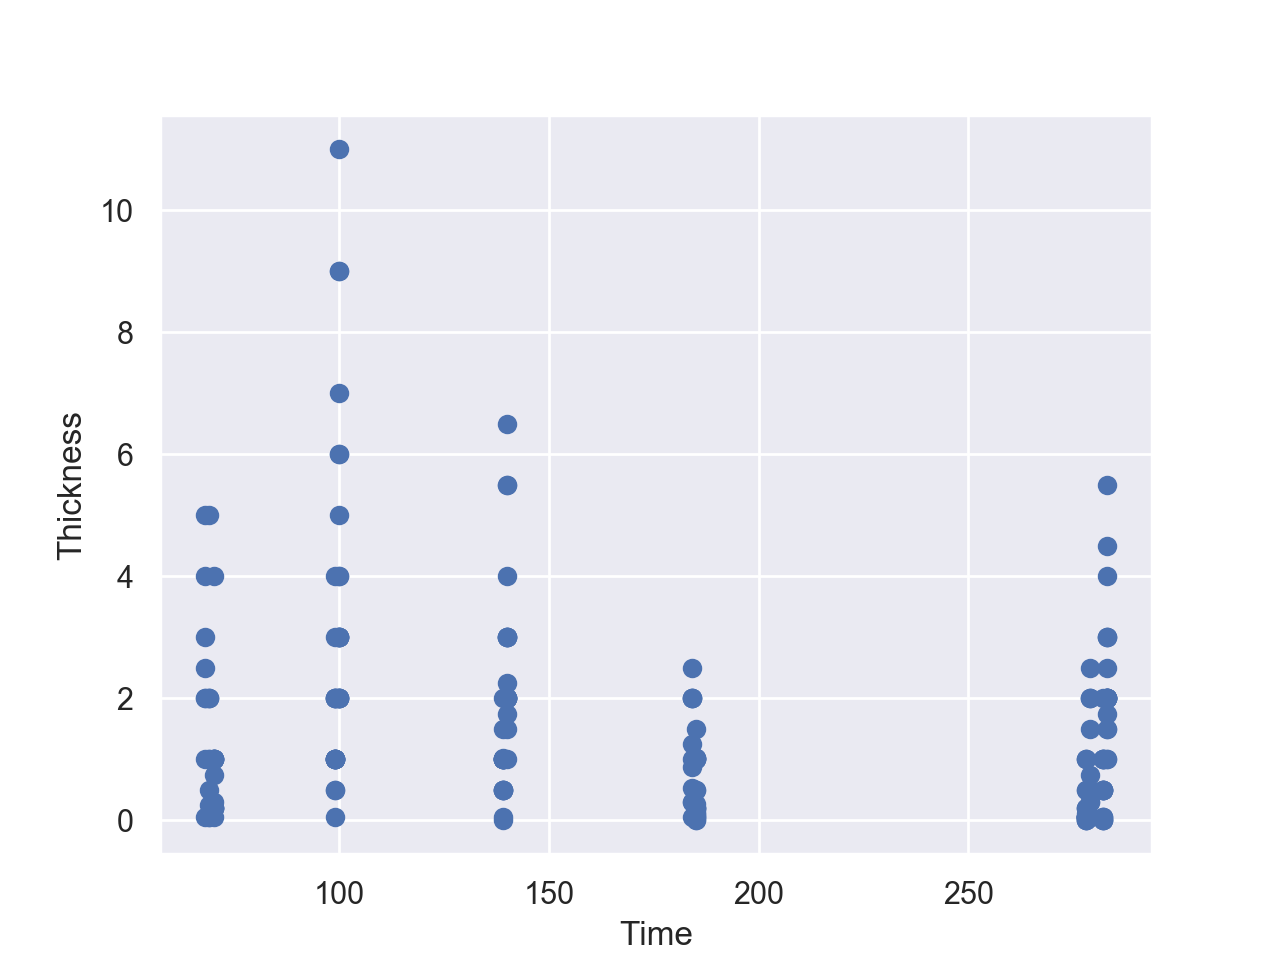

Text(0,0.5,'Thickness')

In [373]:
plt.scatter(df_mask_append_x, df_mask_append_y)
plt.xlabel('Time')
plt.ylabel('Thickness')



In [374]:
plt.close()

# Make loop to set up all stations for regression  (?!?!?!??!?!!)

In [71]:
x1df_mask

,Site,Station,Region,Date1,Date2,Date3,ThicknessD1cm,ThicknessD2cm,ThicknessD3cm,Lat,...,BW3,CBD,LAD,LNK,UFU,WTZ,Manipulated,DiffTime1,DiffTime2,DiffTime3
Ste_Stn,,,,,,,,,,,,,,,,,,,,,
BW2 - BW2 S7,BW11,BW2 S7,TTI,2017-12-19,2018-01-28,2018-06-20,2.00,1.000,1.00,25.92482,...,0,0,0,0,0,0,0,100,140,283
BW3 - BW3 S2,BW4,BW3 S2,TTI,2017-12-19,2018-01-28,2018-06-20,3.00,1.500,1.50,25.92359,...,1,0,0,0,0,0,0,100,140,283
BW3 - BW3 S3,BW5,BW3 S3,TTI,2017-12-19,2018-01-28,2018-06-20,3.00,2.000,1.00,25.92359,...,1,0,0,0,0,0,0,100,140,283
CBD - S15,CBD,S15,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,1.000,0.05,24.64994,...,0,1,0,0,0,0,1,70,184,279
CBD - S16,CBD,S16,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.300,0.30,24.64988,...,0,1,0,0,0,0,0,70,184,279
CBD - S17,CBD,S17,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.300,0.30,24.64989,...,0,1,0,0,0,0,0,70,184,279
CBD - S18,CBD,S18,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.525,0.05,24.64994,...,0,1,0,0,0,0,0,70,184,279
LAD - S10,LAD,S10,LFK,2017-11-18,2018-03-14,2018-06-15,0.10,0.100,0.10,24.66222,...,0,0,1,0,0,0,0,69,185,278
LAD - S11,LAD,S11,LFK,2017-11-18,2018-03-14,2018-06-15,0.05,0.050,0.05,24.66226,...,0,0,1,0,0,0,0,69,185,278


In [164]:
x1 = df_mask.loc[:, 'DiffTime1']
x2 = df_mask.loc[:, 'DiffTime2']
x3 = df_mask.loc[:, 'DiffTime3']
y1 = df_mask.loc[:, 'ThicknessD1cm']
y2 = df_mask.loc[:, 'ThicknessD2cm']
y3 = df_mask.loc[:, 'ThicknessD3cm']


    
xvalue = [x1, x2, x3]
yvalue = [y1, y2, y3]


In [171]:
xvalue = pd.DataFrame(xvalue).T
xvalue
#hey = xvalue['DiffTime1'].append(xvalue['DiffTime2'].append(xvalue['DiffTime3'])).reset_index(drop=True)

Ste_Stn,BW2 - BW2 S7,BW3 - BW3 S2,BW3 - BW3 S3,CBD - S15,CBD - S16,CBD - S17,CBD - S18,LAD - S10,LAD - S11,LAD - S12,...,WTZ - S10,WTZ - S11,WTZ - S2,WTZ - S3,WTZ - S4,WTZ - S5,WTZ - S6,WTZ - S7,WTZ - S8,WTZ - S9
DiffTime1,100,100,100,70,70,70,70,69,69,69,...,70,70,70,70,70,70,70,70,70,70
DiffTime2,140,140,140,184,184,184,184,185,185,185,...,185,185,185,185,185,185,185,185,185,185
DiffTime3,283,283,283,279,279,279,279,278,278,278,...,278,278,278,278,278,278,278,278,278,278


In [95]:
yvalue = pd.DataFrame(yvalue)
yvalue

Ste_Stn,BW2 - BW2 S7,BW3 - BW3 S2,BW3 - BW3 S3,CBD - S15,CBD - S16,CBD - S17,CBD - S18,LAD - S10,LAD - S11,LAD - S12,...,WTZ - S10,WTZ - S11,WTZ - S2,WTZ - S3,WTZ - S4,WTZ - S5,WTZ - S6,WTZ - S7,WTZ - S8,WTZ - S9
ThicknessD1cm,2.0,3.0,3.0,1.00,1.0,1.0,1.000,0.1,0.05,1.0,...,0.2,0.75,1.0,1.0,0.2,0.05,0.2,0.2,0.2,0.30
ThicknessD2cm,1.0,1.5,2.0,1.00,0.3,0.3,0.525,0.1,0.05,1.0,...,0.2,0.50,1.0,0.0,0.0,0.05,0.2,0.2,0.1,0.20
ThicknessD3cm,1.0,1.5,1.0,0.05,0.3,0.3,0.050,0.1,0.05,1.0,...,0.2,0.50,0.0,0.0,0.0,0.05,0.2,0.2,0.0,0.05


In [174]:
xvalue.append(yvalue)

Ste_Stn,BW2 - BW2 S7,BW3 - BW3 S2,BW3 - BW3 S3,CBD - S15,CBD - S16,CBD - S17,CBD - S18,LAD - S10,LAD - S11,LAD - S12,...,WTZ - S10,WTZ - S11,WTZ - S2,WTZ - S3,WTZ - S4,WTZ - S5,WTZ - S6,WTZ - S7,WTZ - S8,WTZ - S9
DiffTime1,100.0,100.0,100.0,70.00,70.0,70.0,70.000,69.0,69.00,69.0,...,70.0,70.00,70.0,70.0,70.0,70.00,70.0,70.0,70.0,70.00
DiffTime2,140.0,140.0,140.0,184.00,184.0,184.0,184.000,185.0,185.00,185.0,...,185.0,185.00,185.0,185.0,185.0,185.00,185.0,185.0,185.0,185.00
DiffTime3,283.0,283.0,283.0,279.00,279.0,279.0,279.000,278.0,278.00,278.0,...,278.0,278.00,278.0,278.0,278.0,278.00,278.0,278.0,278.0,278.00
ThicknessD1cm,2.0,3.0,3.0,1.00,1.0,1.0,1.000,0.1,0.05,1.0,...,0.2,0.75,1.0,1.0,0.2,0.05,0.2,0.2,0.2,0.30
ThicknessD2cm,1.0,1.5,2.0,1.00,0.3,0.3,0.525,0.1,0.05,1.0,...,0.2,0.50,1.0,0.0,0.0,0.05,0.2,0.2,0.1,0.20
ThicknessD3cm,1.0,1.5,1.0,0.05,0.3,0.3,0.050,0.1,0.05,1.0,...,0.2,0.50,0.0,0.0,0.0,0.05,0.2,0.2,0.0,0.05


# Training and Testing Datasets

In [375]:
def splot_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size= int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [376]:
train_set, test_set = splot_train_test(df_mask, 0.2)

In [377]:
train_set

,Site,Station,Region,Date1,Date2,Date3,ThicknessD1cm,ThicknessD2cm,ThicknessD3cm,Lat,...,BW3,CBD,LAD,LNK,UFU,WTZ,Manipulated,DiffTime1,DiffTime2,DiffTime3
Ste_Stn,,,,,,,,,,,,,,,,,,,,,
UFU - UFU MUD 7,UFU,UFU MUD 7,TTI,2017-12-18,2018-01-27,2018-06-19,2.00,1.025,0.05,25.90196,...,0,0,0,0,1,0,0,99,139,282
UFU - UFU MUD 15,UFU,UFU MUD 15,TTI,2017-12-18,2018-01-27,2018-06-19,0.05,0.050,0.05,25.90162,...,0,0,0,0,1,0,0,99,139,282
LAD - S3,LAD,S3,LFK,2017-11-18,2018-03-14,2018-06-15,0.50,0.275,0.05,24.66164,...,0,0,1,0,0,0,0,69,185,278
LAD - S9,LAD,S9,LFK,2017-11-18,2018-03-14,2018-06-15,0.05,0.050,0.05,24.66216,...,0,0,1,0,0,0,0,69,185,278
UFU - UFU MUD 6,UFU,UFU MUD 6,TTI,2017-12-18,2018-01-27,2018-06-19,2.00,0.000,0.00,25.90197,...,0,0,0,0,1,0,1,99,139,282
LAD - S11,LAD,S11,LFK,2017-11-18,2018-03-14,2018-06-15,0.05,0.050,0.05,24.66226,...,0,0,1,0,0,0,0,69,185,278
CBD - S16,CBD,S16,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.300,0.30,24.64988,...,0,1,0,0,0,0,0,70,184,279
WTZ - S10,WTZ,S10,LFK,2017-11-19,2018-03-14,2018-06-15,0.20,0.200,0.20,24.64770,...,0,0,0,0,0,1,0,70,185,278
CBD - S18,CBD,S18,LFK,2017-11-19,2018-03-13,2018-06-16,1.00,0.525,0.05,24.64994,...,0,1,0,0,0,0,0,70,184,279


# Regression with a prediction!

In [378]:
train_x = train_set['DiffTime1'].append(train_set['DiffTime2']).append(train_set['DiffTime3']).reset_index().drop(['Ste_Stn'], axis = 1)
#train_x.columns = ['Time']
train_y = train_set['ThicknessD1cm'].append(train_set['ThicknessD2cm']).append(train_set['ThicknessD3cm']).reset_index().drop(['Ste_Stn'], axis = 1)
#train_y.columns = ['Thickness']

test_x = test_set['DiffTime1'].append(test_set['DiffTime2']).append(test_set['DiffTime3']).reset_index().drop(['Ste_Stn'], axis = 1)
#test_x.columns = ['Time']
test_answers_y = test_set['ThicknessD1cm'].append(test_set['ThicknessD2cm']).append(test_set['ThicknessD3cm']).reset_index().drop(['Ste_Stn'], axis = 1)
#test_answers_y.columns = ['Thickness']

In [379]:
train_frame = pd.concat([train_x, train_y], axis = 1)
train_frame.columns = ['Time', 'Thickness']


test_frame = pd.concat([test_x, test_answers_y], axis = 1)
train_frame.columns = ['Time', 'Thickness']

In [380]:
lin_reg = LinearRegression()
line = lin_reg.fit(train_x, train_y)

lin_reg.score(train_x, train_y)

0.15187464071202761

In [381]:
lin_reg.intercept_

array([ 1.2492164])

<IPython.core.display.Javascript object>


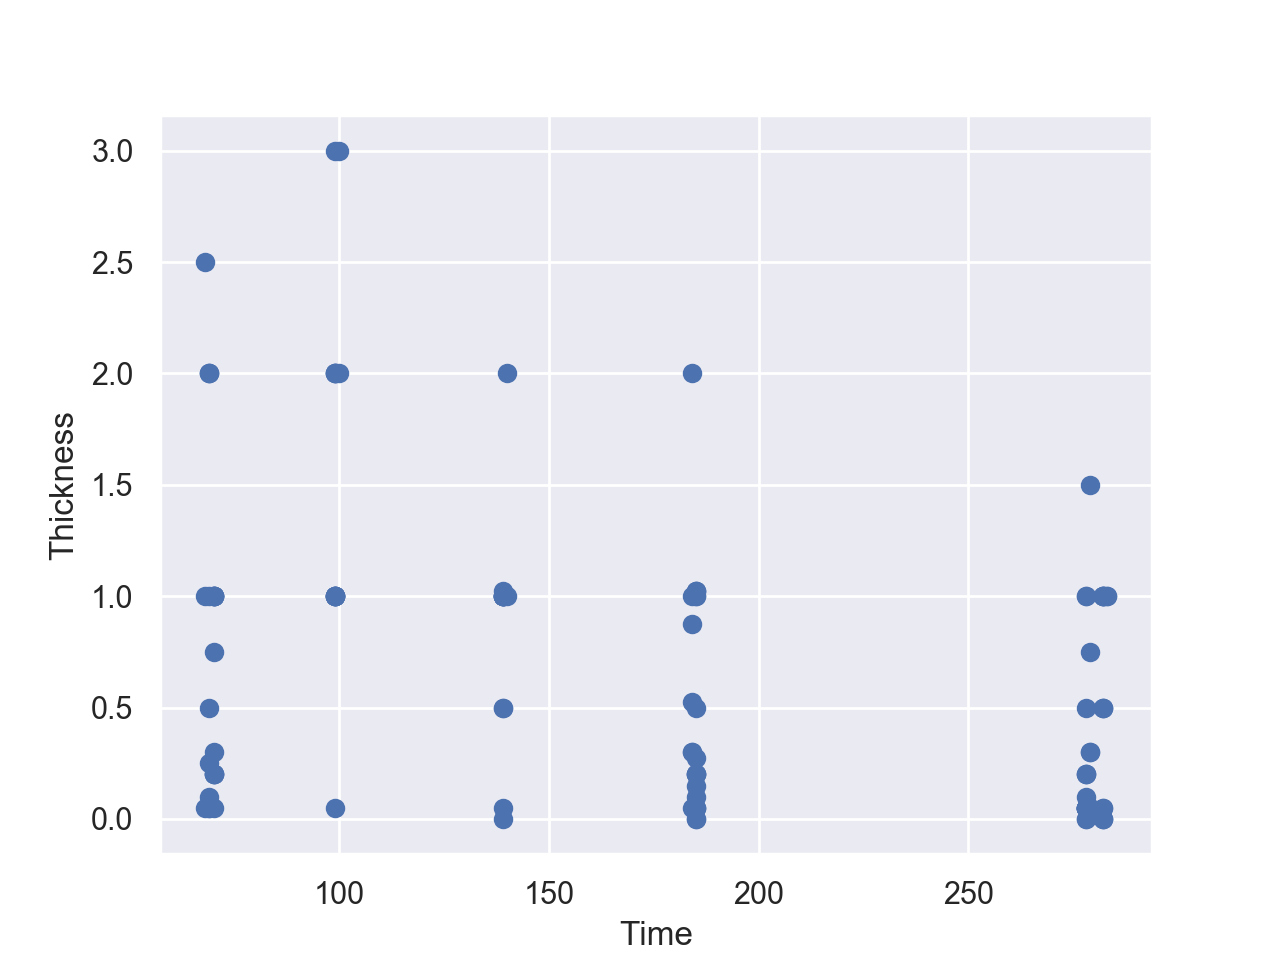

Text(0,0.5,'Thickness')

In [382]:
plt.scatter(train_x, train_y)
plt.xlabel('Time')
plt.ylabel('Thickness')


In [383]:
plt.close()

In [384]:
prediction = lin_reg.predict(np.sort(test_x, axis=0))

<IPython.core.display.Javascript object>


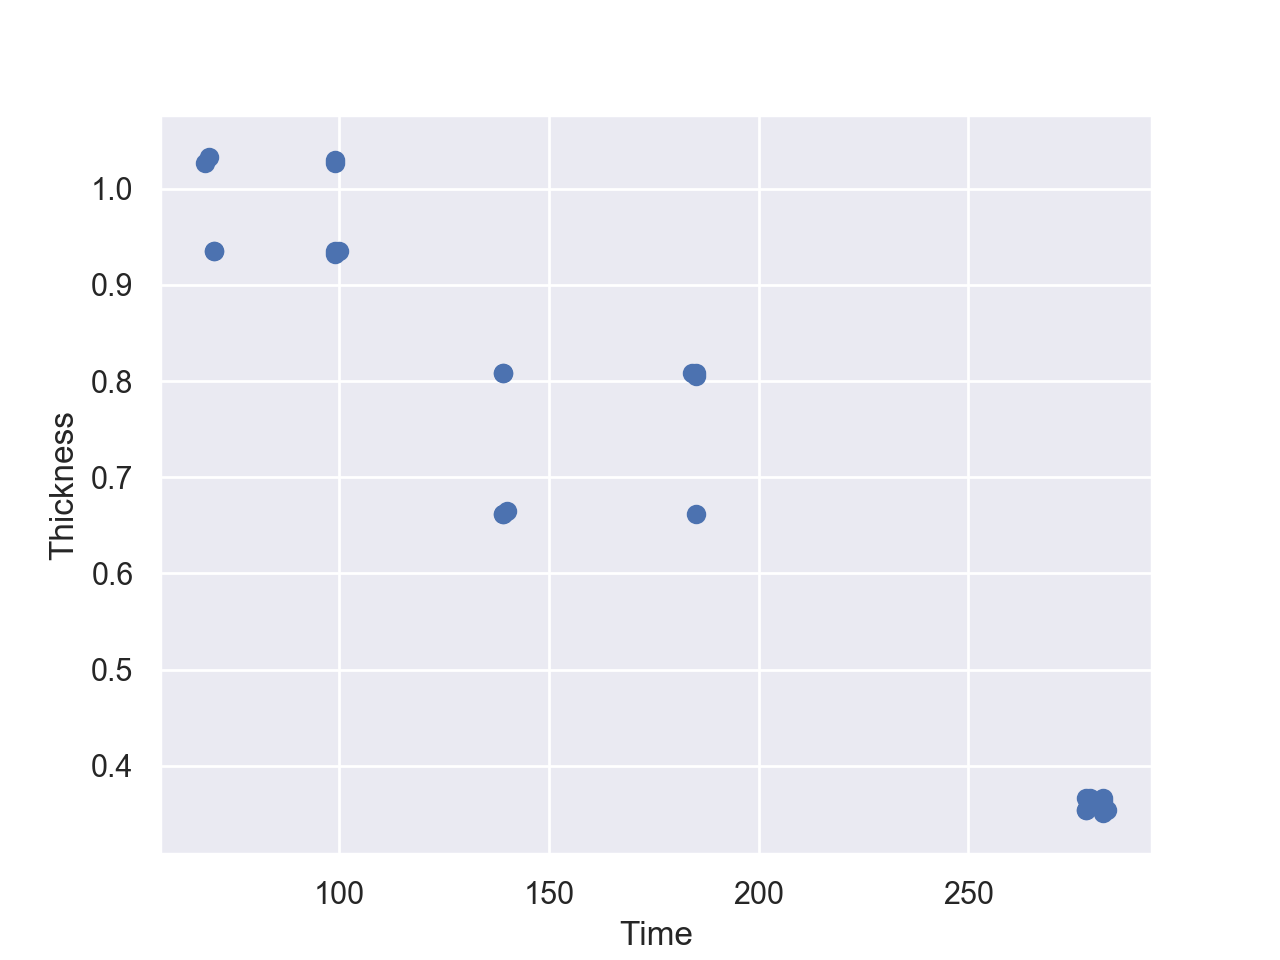

Text(0,0.5,'Thickness')

In [385]:
plt.scatter(test_x, prediction)
plt.xlabel('Time')
plt.ylabel('Thickness')

In [386]:
plt.close()

<IPython.core.display.Javascript object>


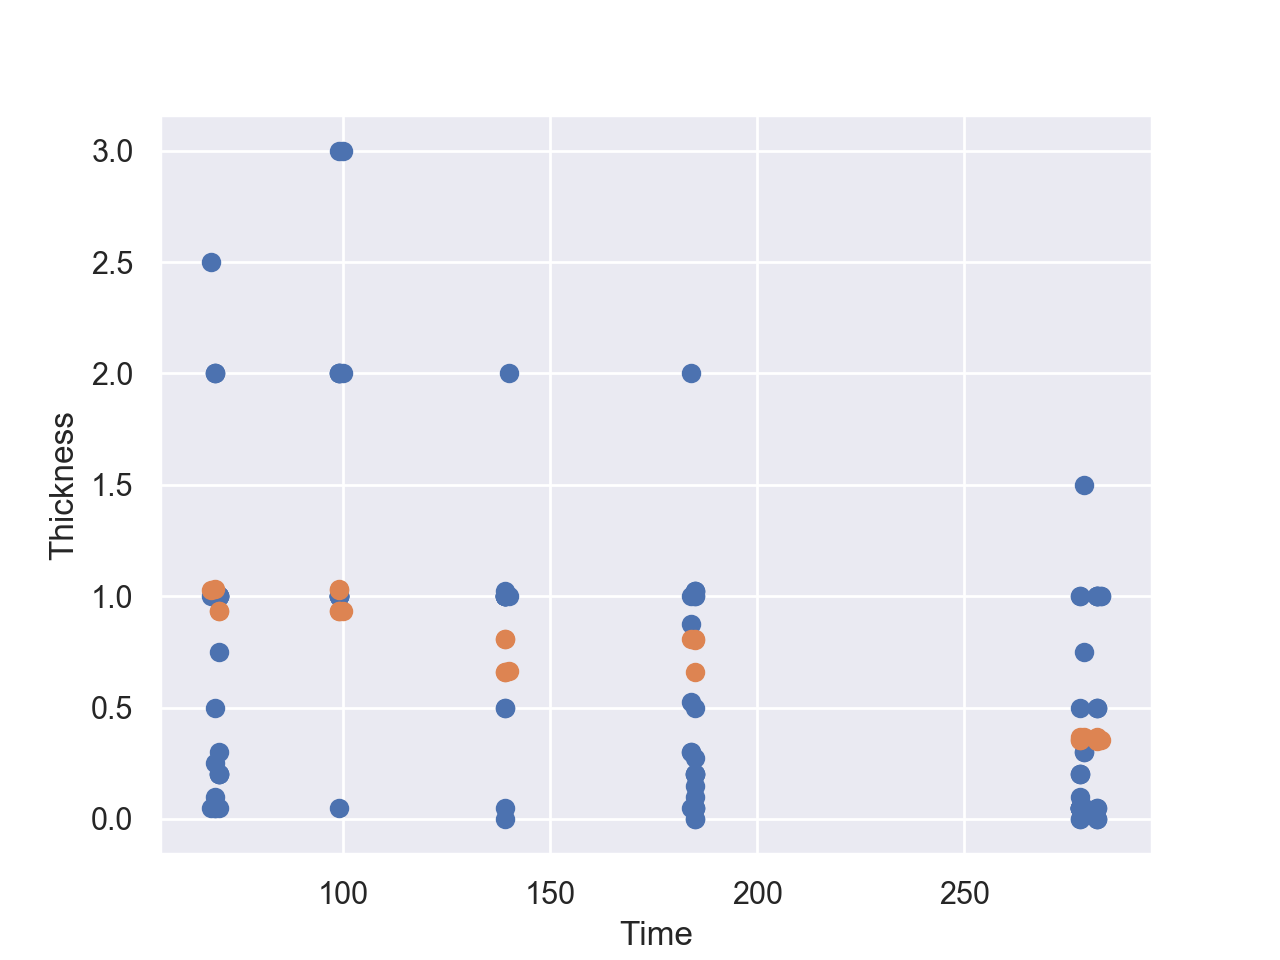

Text(0,0.5,'Thickness')

In [387]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, prediction)
plt.xlabel('Time')
plt.ylabel('Thickness')


In [388]:
plt.close()

In [389]:
mse = mean_squared_error(test_answers_y, prediction)
rmse = np.sqrt(mse)
rmse

0.61841416353949108

In [390]:
prediction


array([[ 1.03335611],
       [ 1.0301817 ],
       [ 1.02700728],
       [ 1.02700728],
       [ 0.93494922],
       [ 0.93494922],
       [ 0.93494922],
       [ 0.93494922],
       [ 0.9317748 ],
       [ 0.80797258],
       [ 0.80797258],
       [ 0.80797258],
       [ 0.80797258],
       [ 0.80479816],
       [ 0.66512386],
       [ 0.66194944],
       [ 0.66194944],
       [ 0.66194944],
       [ 0.36672876],
       [ 0.36672876],
       [ 0.36672876],
       [ 0.36355434],
       [ 0.35403109],
       [ 0.35403109],
       [ 0.35403109],
       [ 0.35403109],
       [ 0.35085668]])

In [391]:
prediction = pd.DataFrame(prediction)
compare = pd.concat([prediction, test_answers_y], axis = 1)
compare.columns = ['Prediction', 'Truth']
compare.sort_values

<bound method DataFrame.sort_values of     Prediction  Truth
0     1.033356   1.00
1     1.030182   0.50
2     1.027007   2.00
3     1.027007   0.50
4     0.934949   0.20
5     0.934949   3.00
6     0.934949   1.00
7     0.934949   1.00
8     0.931775   1.00
9     0.807973   1.00
10    0.807973   0.50
11    0.807973   1.25
12    0.807973   0.50
13    0.804798   0.10
14    0.665124   1.50
15    0.661949   1.00
16    0.661949   0.50
17    0.661949   1.00
18    0.366729   1.00
19    0.366729   0.50
20    0.366729   0.50
21    0.363554   0.50
22    0.354031   0.00
23    0.354031   1.50
24    0.354031   0.00
25    0.354031   0.50
26    0.350857   0.05>

# Plot of the Test Answers and the Test Predictions

<IPython.core.display.Javascript object>


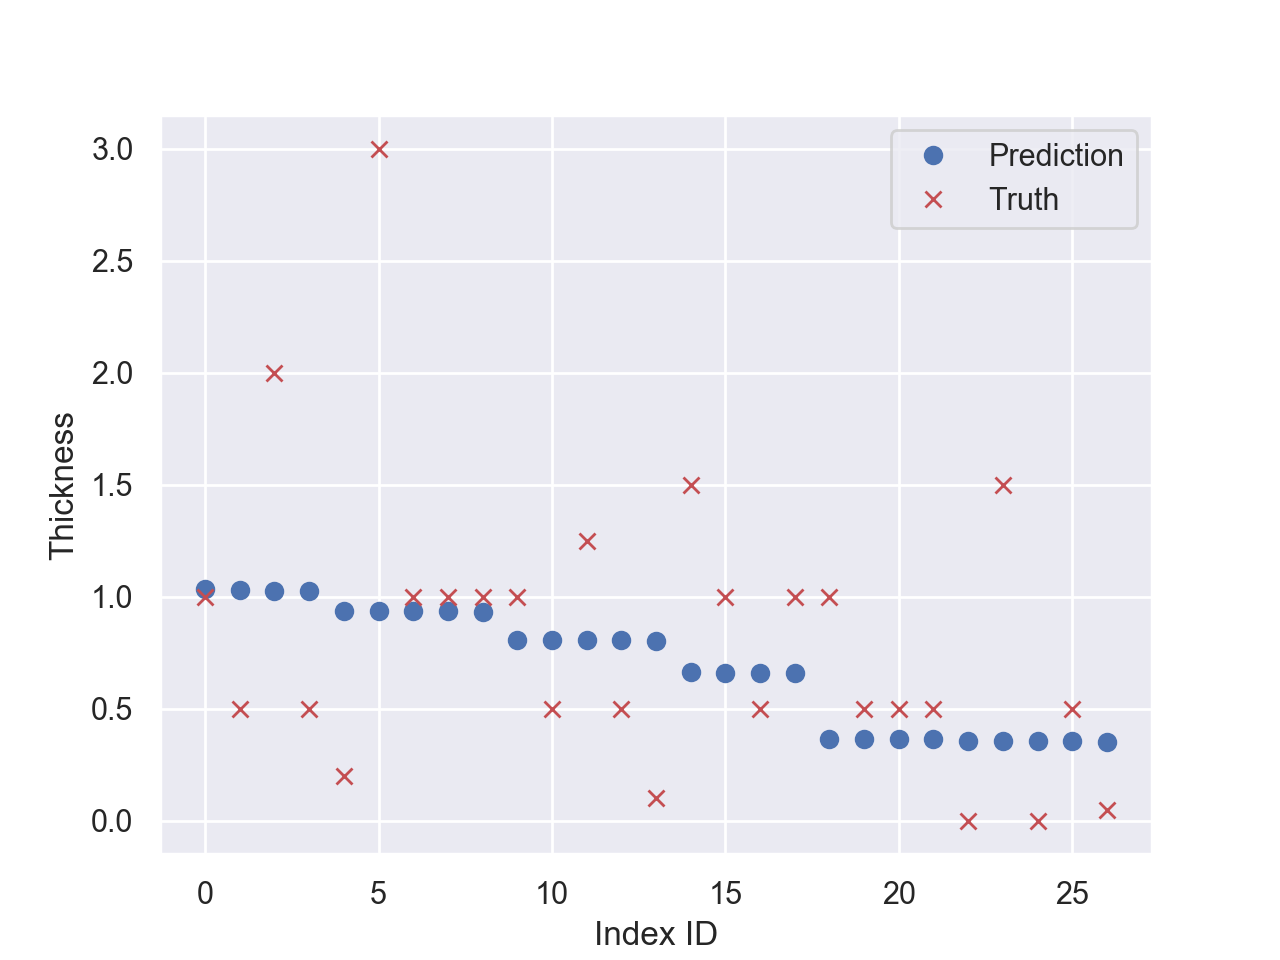

Text(0,0.5,'Thickness')

In [392]:
fig = compare.plot(style=['o','rx'])
fig.set_xlabel("Index ID")
fig.set_ylabel("Thickness")


In [393]:
plt.close()

<IPython.core.display.Javascript object>


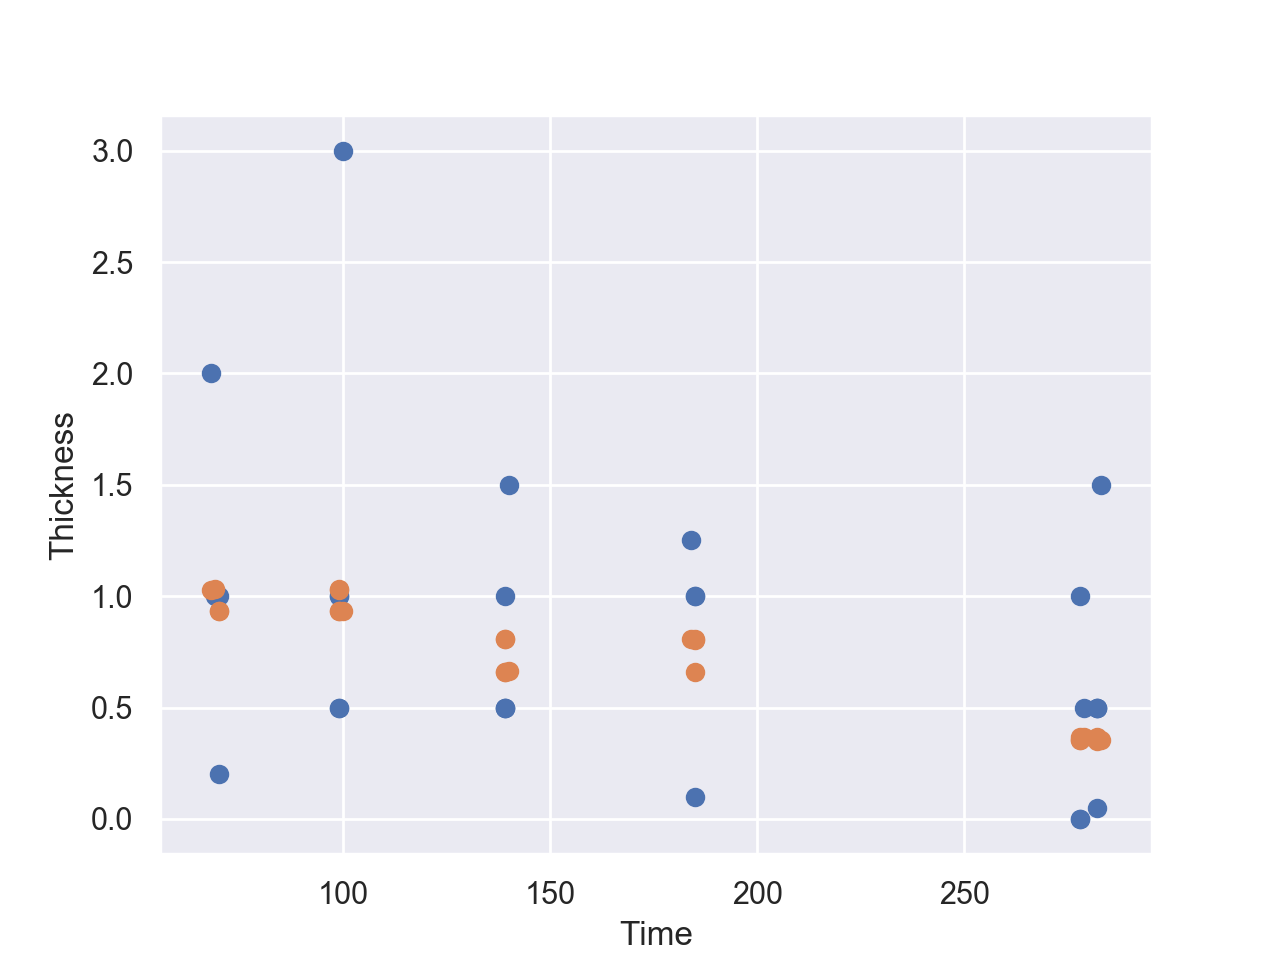

Text(0,0.5,'Thickness')

In [394]:
plt.scatter(test_x, test_answers_y)
plt.scatter(test_x, prediction)
plt.xlabel('Time')
plt.ylabel('Thickness')

In [396]:
plt.close()

<IPython.core.display.Javascript object>


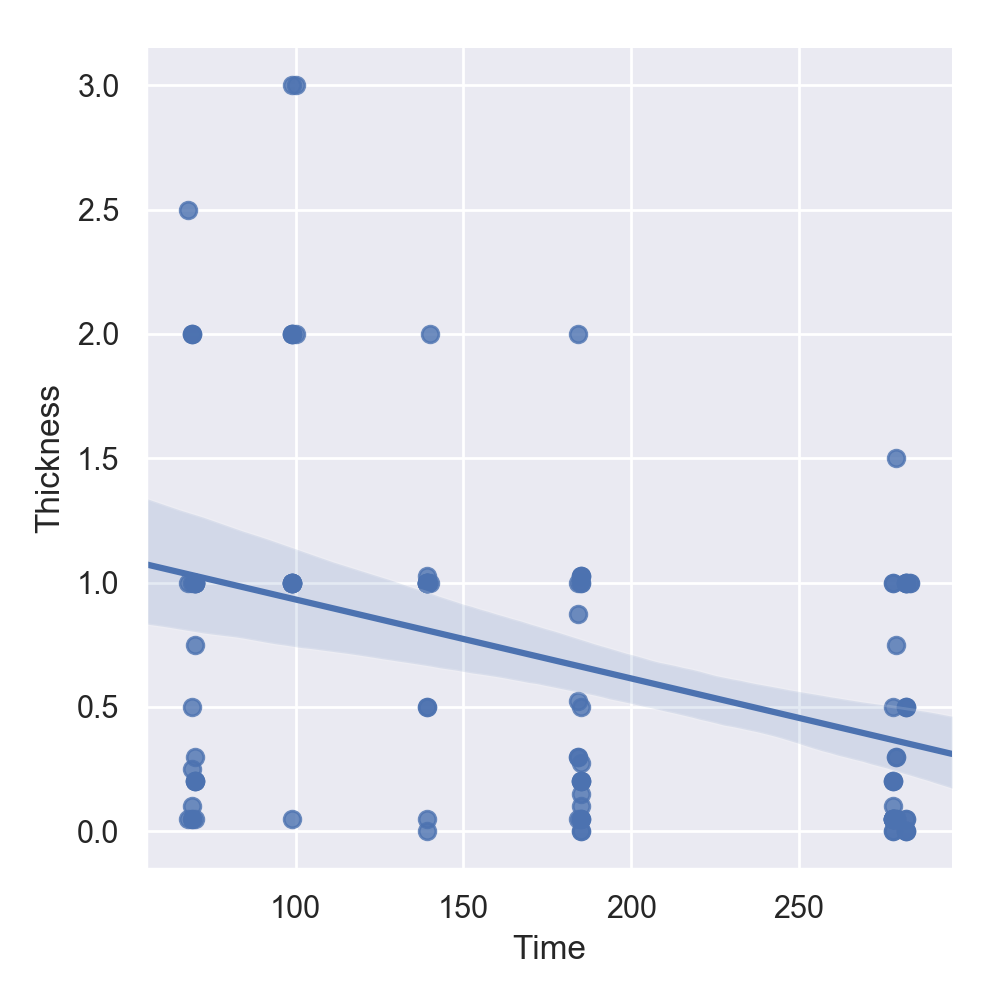

In [397]:
sns.lmplot(data = train_frame, x = "Time", y = 'Thickness', fit_reg=True)

In [398]:
plt.close()

In [ ]:
# df.index.is_unique
# df['Date1'] = pd.to_datetime(df['Date1'])
# df['Date2'] = pd.to_datetime(df['Date2'])
# df['Date3'] = pd.to_datetime(df['Date3'])

# df.index.name

In [ ]:
#sns.lmplot(data = df, x = "DiffTime1", y = 'ThicknessD1cm', fit_reg=True, hue = 'Site')

In [ ]:
#sns.lmplot(data = df, x = 'DiffTime1', y = 'ThicknessD1cm', fit_reg=False)

In [ ]:
# BW2_S1 = df.loc['BW2 - BW2 S1']
# BW2_S1 = pd.DataFrame(BW2_S1)
# BW2_S1 = BW2_S1.T

# BW2_S1['Date1'] = pd.to_datetime(df['Date1'])
# BW2_S1['Date2'] = pd.to_datetime(df['Date2'])
# BW2_S1['Date3'] = pd.to_datetime(df['Date3'])
# BW2_S1


# for station in BW2_S1.index:   
#     x1 = BW2_S1.loc[station]['DiffTime1']
#     x2 = BW2_S1.loc[station]['DiffTime2']
#     x3 = BW2_S1.loc[station]['DiffTime3']
#     y1 = BW2_S1.loc[station]['ThicknessD1cm']
#     y2 = BW2_S1.loc[station]['ThicknessD2cm']
#     y3 = BW2_S1.loc[station]['ThicknessD3cm']
    
# sns.lmplot(data = BW2_S1,x = [x1, x2, x3],y = [y1, y2, y3])
# plt.plot([x, x2, x3], [y, y2, y3], linestyle='-', marker='o', markerfacecolor='tomato', color='lightsalmon', markersize=12)


# xvalue = [BW2_S1.loc[station]['DiffTime1'],BW2_S1.loc[station]['DiffTime2'], BW2_S1.loc[station]['DiffTime3'] ] 
# yvalue = [BW2_S1.loc[station]['ThicknessD1cm'], BW2_S1.loc[station]['ThicknessD2cm'], BW2_S1.loc[station]['ThicknessD3cm']]

# data = pd.DataFrame(data, columns=[xvalue, yvalue])
# data

# sns.lmplot(x = xvalue, y = yvalue)

In [ ]:
# thickness = df['ThicknessD1cm'].append(df['ThicknessD2cm'].append(df['ThicknessD3cm'])).reset_index(drop=True)
# thickness = pd.DataFrame(thickness)
# thickness.head()

# time = df['DiffTime1'].append(df['DiffTime2'].append(df['DiffTime3'])).reset_index(drop=True)
# time = pd.DataFrame(time)
# time.head()

# concat= pd.concat([thickness,time],ignore_index=True, axis=1)

# concat = concat.rename(columns= {0:'Thickness',1:'Diff_Time'})
# concat.head()

# sns.lmplot(data = concat, x = 'Diff_Time', y = 'Thickness', fit_reg=True)

In [ ]:
# for station in df.index:
#     print(station)
#     x = df.loc[station]['DiffTime1']
#     x2 = df.loc[station]['DiffTime2']
#     x3 = df.loc[station]['DiffTime3']
#     y = df.loc[station]['ThicknessD1cm']
#     y2 = df.loc[station]['ThicknessD2cm']
#     y3 = df.loc[station]['ThicknessD3cm']
#     sns.set()
#     plt.plot([x, x2, x3], [y, y2, y3], linestyle='-', marker='o', markerfacecolor='tomato', color='lightsalmon', markersize=12)
#     plt.xlabel('Days Since Hurricane Irma Landfall', fontsize=25)
#     plt.ylabel('Sediment Thickness (cm)', fontsize=20)
#     plt.show()